# Project 2 Notebook

### First, we will import everything we need:

In [2]:
from arcgis.gis import GIS

In [3]:
gis = GIS("http://slustl.maps.arcgis.com/home", "emmaleeblackwood")

Enter password: ········


In [4]:
from IPython.display import display

In [5]:
import json

In [6]:
import pandas as pd

In [7]:
import numpy as np

### We need to create a list with all the excel file names.  To do this, we will use a `for` loop that uses the base file name and goes from 2006-2018.  These are appended and added to the `file_list[]`: 

In [8]:
file_list = []

In [9]:
for i in range(13):
    file_year = 2006 + i
    file_name = "fsi-" + str(file_year) + ".xlsx"
    file_list = np.append(file_list, file_name)

### Now we will add the map and set the renderer variable to a `ClassedColorRenderer` based on the total (which is relative to the rank of fragility with the highest total being the most fragile):

In [10]:
map1 = gis.map()

In [11]:
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [12]:
classed_color_renderer = {"renderer":"ClassedColorRenderer","field_name": "Total"}

### We will use a `for` loop to read each excel file, create a custom name based on the year, and add it to ArcGIS Online as a Feature Service. It will also publish the data as a Feature Layer, so we can add it to `map1` with the classed color renderer:

In [18]:
for file in file_list:
    df = pd.read_excel(file)
    fc = gis.content.import_data(df, {"Address" : "Country"})
    file_year = file[4:8] #Grab year from file name
    title = "Fragile States Index " + str(file_year)
    item_properties = {
    "title": title,
    "tags" : "FSI",
    "snippet": " FSI",
    "description": "Fragile States Index",
    "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer"}
    item = gis.content.add(item_properties)
    fsi_lyr = item.publish()
    map1.add_layer(fsi_lyr, classed_color_renderer)

### To save the WebMap, we will use `map1.save()` and define the item properties to add a title, snippet, etc.  A PNG image is set to be the thumbnail:

<Item title:"Fragile States Index 2006-2018" type:Web Map owner:emmaleeblackwood>
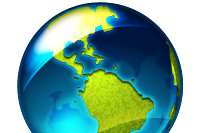

In [19]:
webmap_item_properties = {'title':'Fragile States Index 2006-2018',
                         'snippet':'Map created using Python API showing the fragility of countries',
                         'tags':['fsi', 'world fragility', 'python']}

map1.save(webmap_item_properties, thumbnail='world.png')